In [1]:
# HIDDEN

from datascience import *
path_data = '../../../data/'
import numpy as np
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
%matplotlib inline

### Finding Probabilities ###
Over the centuries, there has been considerable philosophical debate about what probabilities are. Some people think that probabilities are relative frequencies; others think they are long run relative frequencies; still others think that probabilities are a subjective measure of their own personal degree of uncertainty.

In this course, most probabilities will be relative frequencies, though many will have subjective interpretations. Regardless, the ways in which probabilities are calculated and combined are consistent across the different interpretations.

By convention, probabilities are numbers between 0 and 1, or, equivalently, 0% and 100%. Impossible events have probability 0. Events that are certain have probability 1.

Math is the main tool for finding probabilities exactly, though computers are useful for this purpose too. Simulation can provide excellent approximations, with high probability. In this section, we will informally develop a few simple rules that govern the calculation of probabilities. In subsequent sections we will return to simulations to approximate probabilities of complex events.

We will use the standard notation $P(\mbox{event})$ to denote the probability that "event" happens, and we will use the words "chance" and "probability" interchangeably.

### When an Event Doesn't Happen ###
If the chance that event happens is 40%, then the chance that it doesn't happen is 60%. This natural calculation can be described in general as follows:

$$
P(\mbox{an event doesn't happen}) ~=~ 1 - P(\mbox{the event happens})
$$

### When All Outcomes are Equally Likely ###
If you are rolling an ordinary die, a natural assumption is that all six faces are equally likely. Then probabilities of how one roll comes out can be easily calculated as a ratio. For example, the chance that the die shows an even number is
$$
\frac{\mbox{number of even faces}}{\mbox{number of all faces}}
~=~ \frac{\#\{2, 4, 6\}}{\#\{1, 2, 3, 4, 5, 6\}}
~=~ \frac{3}{6}
$$
Similarly,
$$
P(\mbox{die shows a multiple of 3}) ~=~
\frac{\#\{3, 6\}}{\#\{1, 2, 3, 4, 5, 6\}}
~=~ \frac{2}{6}
$$

In general,
$$
P(\mbox{an event happens}) ~=~
\frac{\#\{\mbox{outcomes that make the event happen}\}}
{\#\{\mbox{all outcomes}\}}
$$

provided all the outcomes are equally likely.

Not all random phenomena are as simple as one roll of a die. The two main rules of probability, developed below, allow mathematicians to find probabilities even in complex situations.

### When Two Events Must Both Happen ###
Suppose you have a box that contains three tickets: one red, one blue, and one green. Suppose you draw two tickets at random without replacement; that is, you shuffle the three tickets, draw one, shuffle the remaining two, and draw another from those two. What is the chance you get the green ticket first, followed by the red one?

There are six possible pairs of colors: RB, BR, RG, GR, BG, GB (we've abbreviated the names of each color to just its first letter). All of these are equally likely by the sampling scheme, and only one of them (GR) makes the event happen. So
$$
P(\mbox{green first, then red}) ~=~ 
\frac{\#\{\mbox{GR}\}}{\#\{\mbox{RB, BR, RG, GR, BG, GB}\}} ~=~ \frac{1}{6}
$$

But there is another way of arriving at the answer, by thinking about the event in two stages. First, the green ticket has to be drawn. That has chance $1/3$, which means that the green ticket is drawn first in about $1/3$ of all repetitions of the experiment. But that doesn't complete the event. *Among the 1/3 of repetitions when green is drawn first*, the red ticket has to be drawn next. That happens in about $1/2$ of those repetitions, and so:
$$
P(\mbox{green first, then red}) ~=~ \frac{1}{2} ~\mbox{of}~ \frac{1}{3}
~=~ \frac{1}{6}
$$
This calculation is usually written "in chronological order," as follows.
$$
P(\mbox{green first, then red}) ~=~ \frac{1}{3} ~\times~ \frac{1}{2}
~=~ \frac{1}{6}
$$

The factor of $1/2$ is called " the conditional chance that the red ticket appears second, given that the green ticket appeared first."

In general, we have the **multiplication rule**:
$$
P(\mbox{two events both happen})
~=~ P(\mbox{one event happens}) \times 
P(\mbox{the other event happens, given that the first one happened})
$$

Thus, when there are two conditions – one event must happen, as well as another – the chance is *a fraction of a fraction*, which is smaller than either of the two component fractions. The more conditions that have to be satisfied, the less likely they are to all be satisfied.

### When an Event Can Happen in Two Different Ways ###
Suppose instead we want the chance that one of the two tickets is green and the other red. This event doesn't specify the order in which the colors must appear. So they can appear in either order. 

A good way to tackle problems like this is to *partition* the event so that it can happen in exactly one of several different ways. The natural partition of "one green and one red" is: GR, RG. 

Each of GR and RG has chance $1/6$ by the calculation above. So you can calculate the chance of "one green and one red" by adding them up.

$$
P(\mbox{one green and one red}) ~=~ P(\mbox{GR}) + P(\mbox{RG}) ~=~ 
\frac{1}{6} + \frac{1}{6} ~=~ \frac{2}{6}
$$

In general, we have the **addition rule**:

$$
P(\mbox{an event happens}) ~=~
P(\mbox{first way it can happen}) + P(\mbox{second way it can happen}) ~~~
\mbox{}
$$

provided the event happens in exactly one of the two ways.

Thus, when an event can happen in one of two different ways, the chance that it happens is a sum of chances, and hence bigger than the chance of either of the individual ways.

The multiplication rule has a natural extension to more than two events, as we will see below. So also the addition rule has a natural extension to events that can happen in one of several different ways.

We end the section with examples that use combinations of all these rules.

### At Least One Success ###
Data scientists often work with random samples from populations. A question that sometimes arises is about the likelihood that a particular individual in the population is selected to be in the sample. To work out the chance, that individual is called a "success," and the problem is to find the chance that the sample contains a success.

To see how such chances might be calculated, we start with a simpler setting: tossing a coin two times.

If you toss a coin twice, there are four equally likely outcomes: HH, HT, TH, and TT. We have abbreviated "Heads" to H and "Tails" to T. The chance of getting at least one head in two tosses is therefore 3/4.

Another way of coming up with this answer is to work out what happens if you *don't* get at least one head: both the tosses have to land tails. So
$$
P(\mbox{at least one head in two tosses}) ~=~ 1 - P(\mbox{both tails}) ~=~ 1 - \frac{1}{4}
~=~ \frac{3}{4}
$$

Notice also that 
$$
P(\mbox{both tails}) ~=~ \frac{1}{4} ~=~ \frac{1}{2} \cdot \frac{1}{2} ~=~ \left(\frac{1}{2}\right)^2
$$
by the multiplication rule.

These two observations allow us to find the chance of at least one head in any given number of tosses. For example,
$$
P(\mbox{at least one head in 17 tosses}) ~=~ 1 - P(\mbox{all 17 are tails})
~=~ 1 - \left(\frac{1}{2}\right)^{17}
$$

And now we are in a position to find the chance that the face with six spots comes up at least once in rolls of a die. 

For example,

$$
P(\mbox{a single roll is not 6}) ~=~ P(1) + P(2) + P(3) + P(4) + P(5)
~=~ \frac{5}{6}
$$

Therefore,

$$
P(\mbox{at least one 6 in two rolls}) ~=~ 1 - P(\mbox{both rolls are not 6})
~=~ 1 - \left(\frac{5}{6}\right)^2
$$
and
$$
P(\mbox{at least one 6 in 17 rolls})
~=~ 1 - \left(\frac{5}{6}\right)^{17}
$$

The table below shows these probabilities as the number of rolls increases from 1 to 50.

In [2]:
rolls = np.arange(1, 51, 1)
results = Table().with_columns(
    'Rolls', rolls,
    'Chance of at least one 6', 1 - (5/6)**rolls
)
results

Rolls,Chance of at least one 6
1,0.166667
2,0.305556
3,0.421296
4,0.517747
5,0.598122
6,0.665102
7,0.720918
8,0.767432
9,0.806193
10,0.838494


The chance that a 6 appears at least once rises rapidly as the number of rolls increases.

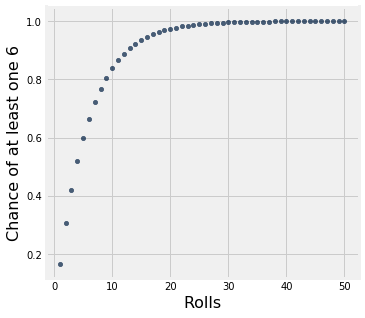

In [3]:
results.scatter('Rolls')

In 50 rolls, you are almost certain to get at least one 6.

In [4]:
results.where('Rolls', are.equal_to(50))

Rolls,Chance of at least one 6
50,0.99989


Calculations like these can be used to find the chance that a particular individual is selected in a random sample. The exact calculation will depend on the sampling scheme. But what we have observed above can usually be generalized: increasing the size of the random sample increases the chance that an individual is selected.